In [2]:
import os
import uuid

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from PIL import Image
import concurrent.futures

In [4]:
N_WORKERS = 6

In [7]:
data = "/Users/alexanderveicht/Desktop/Coding/cil-road-segmentation.nosync/data"
datasets = ['DeepGlobe', "MRD", "CIL"]
datasets_out = ["DeepGlobe", "MRD", "CIL"]
dataset_out = "/Users/alexanderveicht/Desktop/Coding/cil-road-segmentation.nosync/data/big-dataset"

In [6]:
if not os.path.exists(dataset_out):
    print(f"Creating directory: {dataset_out}")
    os.mkdir(dataset_out)
    for ds in datasets_out:
        os.mkdir(os.path.join(dataset_out, ds))
        os.mkdir(os.path.join(dataset_out, ds, "images"))
        os.mkdir(os.path.join(dataset_out, ds, "groundtruth"))

In [7]:
im = Image.open(os.path.join(data, datasets[0], "train", "104_mask.png"))
im.size

(1024, 1024)

In [8]:
# get patches of size (400, 400) from the image
def get_patches(im, size):  # sourcery skip: for-append-to-extend
    patches = []
    for i in range(0, im.size[0] - size[0], size[0]//2):
        for j in range(0, im.size[1] - size[1], size[1]//2):
            patches.append(im.crop((i, j, i + size[0], j + size[1])))
    return patches

patches = get_patches(im, (400, 400))

# Generate Patches from DeepGlobe
This Dataset can be downloaded here: https://www.kaggle.com/datasets/balraj98/deepglobe-road-extraction-dataset

In [9]:
dataset = datasets[0]

# get unique names
fnames = os.listdir(os.path.join(data, dataset, "train"))
fnames = list({name.split("_")[0] for name in fnames})

In [10]:
def process_image(fname):
    img = Image.open(os.path.join(data, dataset, "train", f"{fname}_sat.jpg"))
    target = Image.open(os.path.join(data, dataset, "train", f"{fname}_mask.png"))

    # get patches of size (400, 400) from the image
    img_patches = get_patches(img, (400, 400))
    target_patches = get_patches(target, (400, 400))

    # save patches to disk
    idx = uuid.uuid4()
    for i in range(len(img_patches)):
        if np.sum(target_patches[i]) > 0:
            img_patches[i].save(os.path.join(dataset_out, "DeepGlobe", "images", f"{idx}-{i}.jpg"))
            target_patches[i].save(os.path.join(dataset_out, "DeepGlobe", "groundtruth", f"{idx}-{i}-mask.png"))
    
def process_parallel(file_names):
    with concurrent.futures.ThreadPoolExecutor(max_workers=N_WORKERS) as executor:
        futures = [executor.submit(process_image, f) for f in file_names]
        return [fut.result() for fut in futures]

process_parallel(fnames)

958571 done
949798 done
393252 done
491219 done
482343 done
465844 done
580455 done
455709 done
53041 done
825309 done
889679 done
569545 done
713138 done
525454 done
813464 done
303362 done
44223 done
302663 done
59461 done
677861 done
783598 done
350684 done
982331 done
690443 done
437167 done
714942 done
607896 done
361504 done
531722 done
63238 done
128392 done
360368 done
782731 done
214492 done
697939 done
364453 done
870630 done
224082 done
166996 done
121994 done
490221 done
178753 done
983887 done
418920 done
79292 done
941186 done
794616 done
965349 done
604596 done
316440 done
139431 done
463877 done
135639 done
109493 done
22174 done
318661 done
241269 done
454871 done
727773 done
197397 done
828247 done
881584 done
521507 done
491932 done
188596 done
361334 done
662246 done
767454 done
195501 done
619754 done
25479 done
656508 done
99913 done
503760 done
437316 done
725843 done
157050 done
391989 done
309959 done
159273 done
582928 done
649934 done
340962 done
78795 done
8

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# Generate Patches from MRD
This dataset can be downloaded here: https://www.kaggle.com/datasets/balraj98/massachusetts-roads-dataset

In [12]:
dataset = f"{datasets[1]}/tiff"

def process_image(fname):
    # load .tiff image
    img = Image.open(os.path.join(data, dataset, split, fname))

    # img = Image.open(os.path.join(data, dataset, "train", f"{fname}"))
    target = Image.open(os.path.join(data, dataset, f"{split}_labels", f"{fname}"[:-1]))

    # get patches of size (400, 400) from the image
    img_patches = get_patches(img, (400, 400))
    target_patches = get_patches(target, (400, 400))

    idx = uuid.uuid4()
    for i in range(len(img_patches)):
        keep = np.array(img_patches[i]).mean(axis=-1) > 254
        s = np.sum(keep)
        if s < 100 and np.sum(target_patches[i]) > 0:
            img_patches[i].save(os.path.join(dataset_out, "MRD", "images", f"{idx}-{i}.jpg"))
            target_patches[i].save(os.path.join(dataset_out, "MRD", "groundtruth", f"{idx}-{i}-mask.png"))

def process_parallel(file_names):
    with concurrent.futures.ThreadPoolExecutor(max_workers=N_WORKERS) as executor:
        futures = [executor.submit(process_image, f) for f in file_names]
        return [fut.result() for fut in futures]


for split in ["train", "test", "val"]:
    # get unique names
    fnames = os.listdir(os.path.join(data, dataset, split))
    process_parallel(fnames)
    print(f"{split} done")


train done
test done
val done


# Prepare CIL Data

In [13]:
dataset = datasets[2]
load_data = os.path.join(data, dataset, "training")

for fname in tqdm(os.listdir(os.path.join(load_data, "images"))):
    if fname.endswith(".png"):
        img = Image.open(os.path.join(load_data, "images", fname))
        target = Image.open(os.path.join(load_data, "groundtruth", fname))

        # convert image to jpg
        img = img.convert("RGB")
        target = target.convert("RGB")
        
        img.save(os.path.join(dataset_out, "CIL", "images", f"{fname.split('.')[0]}.jpg"))
        target.save(os.path.join(dataset_out, "CIL", "groundtruth", f"{fname.split('.')[0]}-mask.png"))

100%|██████████| 144/144 [00:12<00:00, 11.54it/s]


# Explore Datasets

In [8]:
data = dataset_out
df = []

for dataset in ["MRD", "DeepGlobe", "CIL"]:
    masks = os.listdir(os.path.join(data, dataset, "groundtruth"))
    for i, mask in tqdm(enumerate(masks), total=len(masks)):
        if mask.endswith("-mask.png"):
            n_pixels = np.sum(np.array(Image.open(os.path.join(data, dataset, "groundtruth", mask))) > 0)
            df.append((mask, dataset, n_pixels))

100%|██████████| 144/144 [00:00<00:00, 641.27it/s]


In [9]:
dataframe = pd.DataFrame(df, columns=["filename", "dataset", "n_pixels"])
dataframe.head()

,filename,dataset,n_pixels
0,b2b966ab-1846-4c7f-9c0e-a4c96e89629b-10-mask.png,MRD,13833
1,4c3dc67d-f82c-4721-81d8-5bafab305253-17-mask.png,MRD,11472
2,62995f6c-9a6b-4ae9-9afc-fde70617c195-23-mask.png,MRD,6512
3,f1197155-776c-4d8f-898f-09b1eec8b8cf-16-mask.png,MRD,5612
4,aeac50cb-4f6f-4c48-99d1-c1fd045e59dd-1-mask.png,MRD,9377


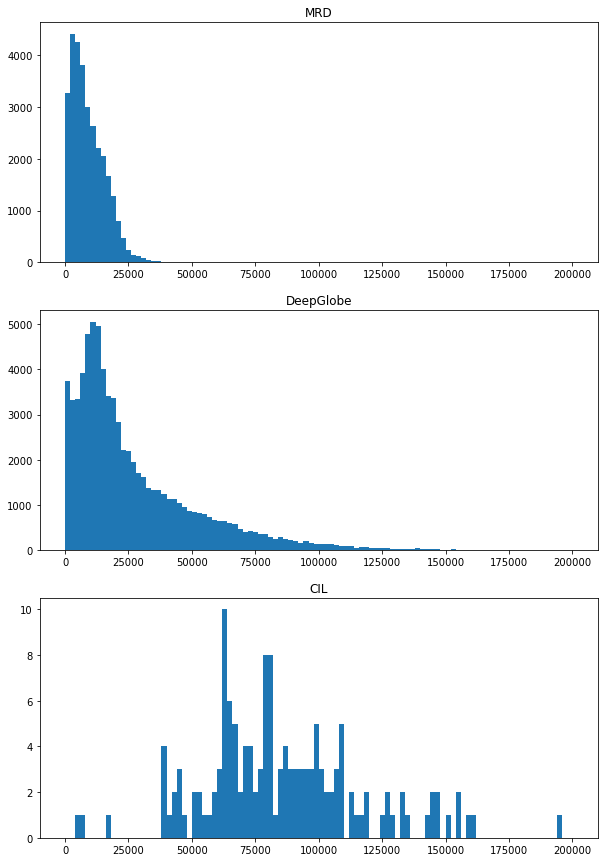

In [10]:
# plot hist per dataset of n_pixels in different plots using plt
plt.figure(figsize=(10, 15))
for i, dataset in enumerate(["MRD", "DeepGlobe", "CIL"]):
    plt.subplot(3, 1, i + 1)
    plt.hist(dataframe[dataframe["dataset"] == dataset]["n_pixels"], bins=100, range=(0, 200000))
    plt.title(dataset)

In [11]:
# count how many masks have more than count pixels
count = 50000
dataframe[dataframe["n_pixels"] > count].groupby("dataset").count()


,filename,n_pixels
dataset,,
CIL,130,130
DeepGlobe,12332,12332
MRD,1,1


In [12]:
dataset_out

'/Users/alexanderveicht/Desktop/Coding/cil-road-segmentation.nosync/data/big-dataset'

In [13]:
dataframe.to_csv(os.path.join(dataset_out, "counts.csv"), index=False)

In [14]:
dataframe = pd.read_csv(os.path.join(dataset_out, "counts.csv"))
dataframe.set_index("filename", inplace=True)
dataframe.head()

,dataset,n_pixels
filename,,
b2b966ab-1846-4c7f-9c0e-a4c96e89629b-10-mask.png,MRD,13833
4c3dc67d-f82c-4721-81d8-5bafab305253-17-mask.png,MRD,11472
62995f6c-9a6b-4ae9-9afc-fde70617c195-23-mask.png,MRD,6512
f1197155-776c-4d8f-898f-09b1eec8b8cf-16-mask.png,MRD,5612
aeac50cb-4f6f-4c48-99d1-c1fd045e59dd-1-mask.png,MRD,9377


# Create overview csv

In [16]:
# create dataframe containing all paths to the images
data = dataset_out
df = []

for dataset in ["CIL", "DeepGlobe", "MRD"]:
    images = os.listdir(os.path.join(data, dataset, "images"))
    for i, img in tqdm(enumerate(images), total=len(images)):
        fname = img.split(".")[0]
        fpath = os.path.join(dataset, "images", img)
        mask_path = os.path.join(dataset, "groundtruth", f"{fname}-mask.png")
        df.append((fname, dataset, fpath, mask_path, "train"))
        

df = pd.DataFrame(df, columns=["filename", "dataset", "fpath", 'mpath', "split"])
df.head()

100%|██████████| 30540/30540 [00:00<00:00, 318161.49it/s]


,filename,dataset,fpath,mpath,split
0,satimage_132,CIL,CIL/images/satimage_132.jpg,CIL/groundtruth/satimage_132-mask.png,train
1,satimage_126,CIL,CIL/images/satimage_126.jpg,CIL/groundtruth/satimage_126-mask.png,train
2,satimage_41,CIL,CIL/images/satimage_41.jpg,CIL/groundtruth/satimage_41-mask.png,train
3,satimage_55,CIL,CIL/images/satimage_55.jpg,CIL/groundtruth/satimage_55-mask.png,train
4,satimage_69,CIL,CIL/images/satimage_69.jpg,CIL/groundtruth/satimage_69-mask.png,train


In [22]:
df["n_pixels"] = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        npix = dataframe.loc[row["mpath"].split("/")[-1], "n_pixels"]
        df.loc[i, "n_pixels"] = npix
    except KeyError:
        print(f"{row['mpath']} not found")
        pass

 87%|████████▋ | 91665/105806 [00:06<00:01, 12986.48it/s]

MRD/groundtruth/b306e65b-1d4c-4724-a460-8995a36ac0fe-29-mask.png not found


100%|██████████| 105806/105806 [00:07<00:00, 14553.69it/s]


In [23]:
df.head()

,filename,dataset,fpath,mpath,split,n_pixels
0,satimage_132,CIL,CIL/images/satimage_132.jpg,CIL/groundtruth/satimage_132-mask.png,train,93630
1,satimage_126,CIL,CIL/images/satimage_126.jpg,CIL/groundtruth/satimage_126-mask.png,train,66480
2,satimage_41,CIL,CIL/images/satimage_41.jpg,CIL/groundtruth/satimage_41-mask.png,train,81729
3,satimage_55,CIL,CIL/images/satimage_55.jpg,CIL/groundtruth/satimage_55-mask.png,train,68058
4,satimage_69,CIL,CIL/images/satimage_69.jpg,CIL/groundtruth/satimage_69-mask.png,train,104205


In [24]:
df.to_csv(os.path.join(dataset_out, "dataset.csv"), index=False)

In [25]:
df[df.dataset == "CIL"]

,filename,dataset,fpath,mpath,split,n_pixels
0,satimage_132,CIL,CIL/images/satimage_132.jpg,CIL/groundtruth/satimage_132-mask.png,train,93630
1,satimage_126,CIL,CIL/images/satimage_126.jpg,CIL/groundtruth/satimage_126-mask.png,train,66480
2,satimage_41,CIL,CIL/images/satimage_41.jpg,CIL/groundtruth/satimage_41-mask.png,train,81729
3,satimage_55,CIL,CIL/images/satimage_55.jpg,CIL/groundtruth/satimage_55-mask.png,train,68058
4,satimage_69,CIL,CIL/images/satimage_69.jpg,CIL/groundtruth/satimage_69-mask.png,train,104205
...,...,...,...,...,...,...
139,satimage_64,CIL,CIL/images/satimage_64.jpg,CIL/groundtruth/satimage_64-mask.png,train,89532
140,satimage_58,CIL,CIL/images/satimage_58.jpg,CIL/groundtruth/satimage_58-mask.png,train,84591
141,satimage_103,CIL,CIL/images/satimage_103.jpg,CIL/groundtruth/satimage_103-mask.png,train,90603
142,satimage_117,CIL,CIL/images/satimage_117.jpg,CIL/groundtruth/satimage_117-mask.png,train,62646
